In [ ]:
# Python ≥3.5 is required

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(55000, 28, 28) (5000, 28, 28) (10000, 28, 28)
(55000,) (5000,) (10000,)


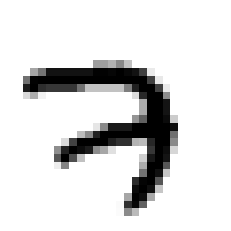

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

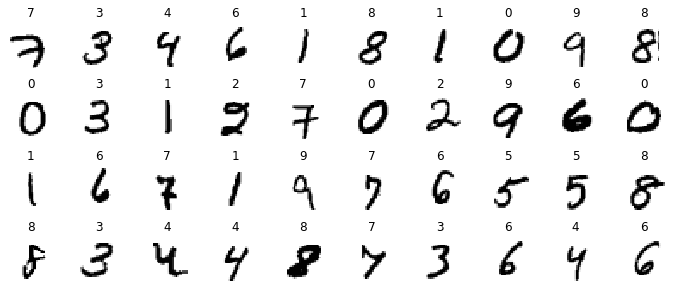

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
 
plt.show()

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 18s 10ms/step - loss: nan - accuracy: 0.5658 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

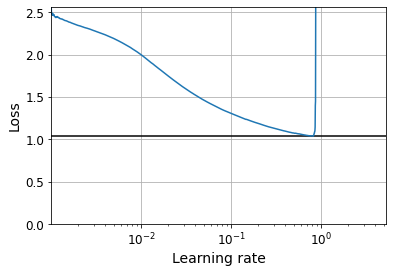

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [ ]:
min(expon_lr.losses)

1.0394073724746704

In [ ]:
expon_lr.rates[np.argmin(expon_lr.losses)]

0.9560881

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2379 - accuracy: 0.9271 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0944 - accuracy: 0.9709 - val_loss: 0.0919 - val_accuracy: 0.9746
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0651 - accuracy: 0.9787 - val_loss: 0.0708 - val_accuracy: 0.9806
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0469 - accuracy: 0.9840 - val_loss: 0.0714 - val_accuracy: 0.9798
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.0727 - val_accuracy: 0.9822
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0254 - accuracy: 0.9913 - val_loss: 0.0729 - val_accuracy: 0.9826
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0893 - val_ac

In [ ]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9866


[0.04062158614397049, 0.9865999817848206]

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0735 - val_accuracy: 0.9790
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0792 - val_accuracy: 0.9782
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0744 - val_accuracy: 0.9818
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0756 - val_accuracy: 0.9812
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.0802 - val_accuracy: 0.9810
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0722 - val_accuracy: 0.9840
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0716 - val_accuracy:

In [ ]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_03_28-01_44_02'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 27.3063 - val_loss: 27.3217
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 27.3058 - val_loss: 27.3213
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 27.3057 - val_loss: 27.3210
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 27.3052 - val_loss: 27.3208
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 27.3050 - val_loss: 27.3206
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 27.3049 - val_loss: 27.3204
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 27.3048 - val_loss: 27.3203
Epoch 8/10
1719/1719 [==============================] - 8s 4ms/step - loss: 27.3047 - val_loss: 27.3202
Epoch 9/10
1719/1719 [==============================] - 8s 5ms/step - loss: 27.3044 - val_loss: 27.3201
Epoch 10/10
1719/1719 [==============================] - 7s 4ms/

In [ ]:
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=128, epochs=30,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 4s 8ms/step - loss: 2.1035 - accuracy: 0.4362 - val_loss: 1.8393 - val_accuracy: 0.6410
Epoch 2/30
430/430 [==============================] - 3s 8ms/step - loss: 1.5454 - accuracy: 0.7056 - val_loss: 1.2484 - val_accuracy: 0.7602
Epoch 3/30
430/430 [==============================] - 3s 7ms/step - loss: 1.0614 - accuracy: 0.7933 - val_loss: 0.8873 - val_accuracy: 0.8186
Epoch 4/30
430/430 [==============================] - 3s 7ms/step - loss: 0.7997 - accuracy: 0.8323 - val_loss: 0.6999 - val_accuracy: 0.8494
Epoch 5/30
430/430 [==============================] - 3s 8ms/step - loss: 0.6576 - accuracy: 0.8531 - val_loss: 0.5903 - val_accuracy: 0.8664
Epoch 6/30
430/430 [==============================] - 3s 7ms/step - loss: 0.5706 - accuracy: 0.8662 - val_loss: 0.5195 - val_accuracy: 0.8756
Epoch 7/30
430/430 [==============================] - 3s 7ms/step - loss: 0.5125 - accuracy: 0.8759 - val_loss: 0.4701 - val_accuracy: 0.8872
Epoch 

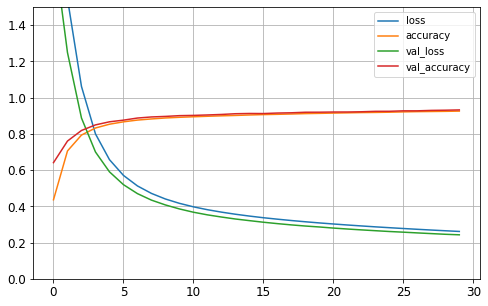

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

In [ ]:
y_pred

array([[9.06663999e-14, 5.35963600e-11, 9.96871752e-11, 1.82844833e-08,
        2.35551433e-13, 5.54576871e-12, 5.60681707e-16, 1.00000000e+00,
        8.14959818e-12, 9.83302684e-09],
       [3.35019725e-14, 2.36049114e-11, 1.00000000e+00, 1.52163091e-11,
        7.98024717e-22, 1.00437583e-18, 1.08045736e-16, 4.50442857e-17,
        1.53438206e-14, 3.64028006e-23],
       [5.03323295e-13, 9.99999404e-01, 1.37365486e-09, 5.66548364e-10,
        5.77079895e-08, 3.67599597e-11, 1.57861627e-10, 5.74403487e-07,
        1.05872875e-08, 2.69037032e-11]], dtype=float32)

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'gdrive/My Drive/Colab Notebooks/MRI_Images'

labels = pd.read_csv('gdrive/My Drive/Colab Notebooks/MRI_Images/labels-1.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [38]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
file_dir = 'gdrive/My Drive/Colab Notebooks/MRI_Images/'
print(file_dir)

gdrive/My Drive/Colab Notebooks/MRI_Images/


In [43]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(487,) (122,)


In [44]:
DS = 8             # Downsample rate, must be a multiple of 30976

N_train = y_train.shape[0]  # The length of the training data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_train = np.zeros([N_train*DS,im_size])
yds_train = np.zeros([N_train*DS])
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train[n,i::DS]
        yds_train[n+i] = y[n]
        
print(Xds_train.shape)
N_train = y_train.shape[0]

(3896, 3872)


In [45]:
 DS = 8             # Downsample rate, must be a multiple of 30976

N_test = y_test.shape[0]  # The length of the test data

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)

Xds_test= np.zeros([N_test*DS,im_size])
yds_test = np.zeros([N_test*DS])
    
for n in range(N_test):
    for i in range(DS):
        Xds_test[n+i,:] = X_test[n,i::DS]
        yds_test[n+i] = y[n]
        
print(Xds_test.shape)
print(yds_test.shape)

(976, 3872)
(976,)


In [46]:
X_test = X_test / 255.0
X_valid, X_train = Xds_train[:500], Xds_train[500:]
y_valid, y_train = yds_train[:500], yds_train[500:]

In [47]:
import tensorflow as tf
from tensorflow import keras
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks


K = keras.backend
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("data_1", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "data_1", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [49]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[3872]))
for _ in range(5): #building neural network with 5 hidden layers
    model.add(keras.layers.Dense(100,
                                 activation="sigmoid",
                                 kernel_initializer="he_normal"))

In [50]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [51]:
history=model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/20
107/107 [==============================] - 4s 24ms/step - loss: 4.3738 - accuracy: 0.0000e+00 - val_loss: 3.7283 - val_accuracy: 0.0000e+00
Epoch 2/20
107/107 [==============================] - 2s 21ms/step - loss: 2.9564 - accuracy: 0.7644 - val_loss: 2.5083 - val_accuracy: 0.5980
Epoch 3/20
107/107 [==============================] - 2s 19ms/step - loss: 1.7035 - accuracy: 1.0000 - val_loss: 1.5781 - val_accuracy: 0.5980
Epoch 4/20
107/107 [==============================] - 3s 24ms/step - loss: 0.8718 - accuracy: 1.0000 - val_loss: 1.1020 - val_accuracy: 0.5980
Epoch 5/20
107/107 [==============================] - 2s 21ms/step - loss: 0.4646 - accuracy: 1.0000 - val_loss: 0.9176 - val_accuracy: 0.5980
Epoch 6/20
107/107 [==============================] - 2s 21ms/step - loss: 0.2803 - accuracy: 1.0000 - val_loss: 0.8509 - val_accuracy: 0.5980
Epoch 7/20
107/107 [==============================] - 2s 20ms/step - loss: 0.1883 - accuracy: 1.0000 - val_loss: 0.8289 - val_accuracy

In [52]:
model.evaluate(X_valid, y_valid)

16/16 [==============================] - 0s 5ms/step - loss: 0.9487 - accuracy: 0.5980


[0.9486635327339172, 0.5979999899864197]

In [53]:
#Scaling X_valid
from sklearn.preprocessing import StandardScaler
from pickle import dump
scaler = StandardScaler()
X = scaler.fit_transform(X_valid)
dump(scaler, open('scaler.pkl', 'wb'))

In [54]:
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

In [55]:
scaler.transform(X)

array([[-7.18493082e+00, -7.31909923e+00, -7.53515096e+00, ...,
        -6.64385197e+00, -6.66828097e+00, -6.71961393e+00],
       [-7.18493082e+00, -7.31909923e+00, -7.53515096e+00, ...,
        -6.64385197e+00, -6.66828097e+00, -6.71961393e+00],
       [ 6.83690016e+00,  1.87836229e-01,  7.81506517e+00, ...,
        -6.64385197e+00, -6.66828097e+00, -6.71961393e+00],
       ...,
       [-2.11503055e+02, -2.11507966e+02, -2.09563916e+02, ...,
        -2.16767980e+02, -2.16552370e+02, -2.16071171e+02],
       [-2.11503055e+02, -2.11507966e+02, -2.09563916e+02, ...,
        -2.16767980e+02, -2.16552370e+02, -2.16071171e+02],
       [-2.11503055e+02, -2.11507966e+02, -2.09563916e+02, ...,
        -2.16767980e+02, -2.16552370e+02, -2.16071171e+02]])

In [56]:
#probability predicted
pred = model.predict(X) #prediction on scaled values of X_valid
print(pred)


[[0.9981947  0.14324075 0.09084257 ... 0.12829992 0.05662742 0.13242653]
 [0.9981934  0.1435495  0.09087545 ... 0.1282404  0.05674204 0.13310856]
 [0.99819636 0.14377734 0.09100631 ... 0.12859353 0.0566256  0.13276461]
 ...
 [0.9981866  0.14304894 0.09010857 ... 0.12791681 0.05685669 0.13258833]
 [0.9981866  0.14304891 0.0901086  ... 0.1279169  0.05685669 0.13258833]
 [0.9981866  0.14304891 0.0901086  ... 0.1279169  0.05685669 0.13258833]]


In [57]:
X_new = X_valid[:3]
y_pred = model.predict(X_new)
X_new1 = Xds_test[:3]
y_pred1 = model.predict(X_new1)
y_pred1.round(2)

array([[1.  , 0.14, 0.09, 0.1 , 0.03, 0.11, 0.14, 0.09, 0.05, 0.04, 0.04,
        0.1 , 0.18, 0.1 , 0.19, 0.12, 0.07, 0.07, 0.1 , 0.1 , 0.08, 0.03,
        0.08, 0.02, 0.02, 0.05, 0.05, 0.05, 0.13, 0.09, 0.04, 0.08, 0.19,
        0.18, 0.14, 0.05, 0.21, 0.08, 0.06, 0.05, 0.1 , 0.06, 0.08, 0.09,
        0.19, 0.01, 0.06, 0.05, 0.03, 0.08, 0.22, 0.03, 0.02, 0.23, 0.15,
        0.05, 0.03, 0.12, 0.06, 0.09, 0.15, 0.07, 0.1 , 0.05, 0.26, 0.06,
        0.12, 0.06, 0.14, 0.03, 0.05, 0.05, 0.07, 0.28, 0.06, 0.04, 0.06,
        0.22, 0.25, 0.13, 0.08, 0.07, 0.08, 0.01, 0.08, 0.03, 0.12, 0.3 ,
        0.03, 0.07, 0.04, 0.07, 0.09, 0.04, 0.06, 0.01, 0.05, 0.13, 0.06,
        0.13],
       [1.  , 0.14, 0.09, 0.1 , 0.03, 0.11, 0.14, 0.09, 0.05, 0.04, 0.04,
        0.1 , 0.18, 0.1 , 0.19, 0.12, 0.07, 0.07, 0.1 , 0.1 , 0.08, 0.03,
        0.08, 0.02, 0.02, 0.05, 0.05, 0.05, 0.13, 0.09, 0.04, 0.08, 0.19,
        0.18, 0.14, 0.05, 0.21, 0.08, 0.06, 0.05, 0.1 , 0.06, 0.08, 0.09,
        0.19, 0.01, 0.0

In [58]:
model.save("my_keras_model.h5")
model1 = keras.models.load_model("my_keras_model.h5")
model1.predict(X_new)

array([[0.99819463, 0.1435009 , 0.09098148, 0.10093409, 0.0269137 ,
        0.10865271, 0.13956141, 0.09200954, 0.04839087, 0.04126227,
        0.0439781 , 0.10011828, 0.18306896, 0.09963146, 0.18676385,
        0.12367517, 0.07307047, 0.07388479, 0.09510243, 0.09599411,
        0.08280665, 0.03203982, 0.07906574, 0.02161312, 0.02149573,
        0.04593477, 0.04940787, 0.04680592, 0.13126835, 0.09057099,
        0.04268569, 0.07866696, 0.18536082, 0.1752837 , 0.14117357,
        0.05459258, 0.20899981, 0.07950988, 0.06414348, 0.05193356,
        0.10094073, 0.06227356, 0.08475271, 0.09194455, 0.18795708,
        0.01401901, 0.05735034, 0.046065  , 0.02990445, 0.0806382 ,
        0.21588531, 0.0348123 , 0.01568499, 0.2270467 , 0.14573908,
        0.04962915, 0.02885777, 0.12260234, 0.06464645, 0.08658198,
        0.15378451, 0.07232454, 0.10424575, 0.05107915, 0.2559366 ,
        0.05787784, 0.12033188, 0.05822158, 0.14224938, 0.02724981,
        0.0515722 , 0.04921165, 0.06902224, 0.28

In [59]:
model.save_weights("my_keras_weights.ckpt")

In [60]:
model.load_weights("my_keras_weights.ckpt")